<a href="https://colab.research.google.com/github/johnfcchan/crackdatescience/blob/master/Prediction_on_Kaggle_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Import Libs

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

#2 Load Datasets

In [3]:
data_dir = 'airbnb'
fnames = ['Airbnb_Listings.csv', 'neighbourhoods.csv', 'reviews.csv']
fname = fnames[0]
dfs = []

for fname in fnames:
    dfs.append(
        pd.read_csv(os.path.join(
            "../project_bnb-kgl",
            data_dir, fname),
                    index_col=0))
dfs[0].head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,NaN,NaN,https://a0.muscache.com/im/pictures/529448/3d7...,NaN,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,$90.00,$440.00,"$1,428.00",$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,NaN,NaN,https://a0.muscache.com/im/pictures/121321/2c5...,NaN,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United S

In [4]:
dfs[1].head()

,neighbourhood
neighbourhood_group,
NaN,Campbell
NaN,Cupertino
NaN,Gilroy
NaN,Los Altos
NaN,Los Altos Hills


In [5]:
dfs[2].head()

,date
listing_id,
4952,2009-08-02
4952,2009-09-04
4952,2009-10-16
4952,2009-12-10
4952,2010-06-08


#3 EDA - Drop & Impute

##3.1 df-Listing

### 3.1.0 Transform price, weekly_price, & monthly_price

In [6]:
from re import sub
from decimal import Decimal

money = '$6,150,593.22'
value = Decimal(sub(r'[^\d.]', '', money))

In [7]:
# dfs[0].weekly_price.notnull()

In [8]:
def parse_price(p): 
    # print(type(p))
    # if p:
    # if not np.isnan(p):
    # p = str(p)
    if not pd.isna(p):
        # return float(p.split('$')[-1].replace(',', ''))
        return Decimal(sub(r'[^\d.]', '', p))
        # return float(sub(r'[^\d.]', '', p))
# dfs[0].monthly_price.map(parse_price)
# dfs[0].monthly_price.map(parse_price).astype(np.float)
dfs[0]['price'] = dfs[0].price.map(parse_price)
dfs[0]['weekly_price'] = dfs[0].weekly_price.map(parse_price)
dfs[0]['monthly_price'] = dfs[0].monthly_price.map(parse_price)
dfs[0] = dfs[0].astype({'price': np.float, 'weekly_price': np.float, 'monthly_price': np.float})

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_20681/2097678152.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dfs[0] = dfs[0].astype({'price': np.float, 'weekly_price': np.float, 'monthly_price': np.float})


In [9]:
dfs[0].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 4952 to 43591340
Data columns (total 105 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    listing_url                                   object 
 1    scrape_id                                     int64  
 2    last_scraped                                  object 
 3    name                                          object 
 4    summary                                       object 
 5    space                                         object 
 6    description                                   object 
 7    experiences_offered                           object 
 8    neighborhood_overview                         object 
 9    notes                                         object 
 10   transit                                       object 
 11   access                                        object 
 12   interaction                            

### 3.1.1Regular Drop

In [10]:
dfs[0].info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 4952 to 43591340
Data columns (total 105 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    listing_url                                   7221 non-null   object 
 1    scrape_id                                     7221 non-null   int64  
 2    last_scraped                                  7221 non-null   object 
 3    name                                          7220 non-null   object 
 4    summary                                       6922 non-null   object 
 5    space                                         5514 non-null   object 
 6    description                                   6983 non-null   object 
 7    experiences_offered                           7221 non-null   object 
 8    neighborhood_overview                         4544 non-null   object 
 9    notes                                      

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_20681/1100731088.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  dfs[0].info(verbose=True, null_counts=True)


In [11]:
dfs[0].columns[:30]

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url'],
      dtype='object')

In [12]:
drops_NLP = ['listing_url', 'scrape_id', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url',
       'host_location', 'host_about',
       'host_response_time', 
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 
       'host_verifications']
""" 
KEEP 
last_scraped, host_id, 'host_response_rate', 'host_acceptance_rate'
"""
drops_all_NA = ['thumbnail_url', 'medium_url', 'xl_picture_url', 'neighbourhood_group_cleansed', 'license']

dfs_0_dropped = dfs[0].drop(list(set(drops_NLP + drops_all_NA)), axis=1)
dfs_0_dropped.head(5)

,last_scraped,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4952,2020-05-30,7054,Mei Lin,2009-01-24,100%,98%,Palo Alto,5.0,5.0,t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,90.0,440.0,1428.0,$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
11464,2020-05-31,42458,Emey,2009-09-30,100%,90%,Santa Clara,13.0,13.0,t,f,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,CA,95051,"South Bay, CA","Santa Clara, CA",US,United States,37.34342,-121.98829,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",325.0,85.0,NaN,2100.0,$700.00,$250.00,1,$10.00,14,365,14,14,365,365,14.0,365.0,5 months ago,t,30,60,90,179,2020-05-31,6,1,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,f,"{""SANTA CLARA""}",f,f,moderate,f,t,12,12,0,0,0.08
17884,2020-05-31,69023,Janet,2010-01-08,100%,50%,Palo Alto,2.0,2.0,t,t,"Mountain View, CA, United States",Mountain View,Mountain View,Mountain View,CA,94041,"South Bay, CA","Mountain View, CA",US,United States,37.38612,-122.07357,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,65.0,1400.0,2800.0,"$1,000.00",NaN,1,$0.00,30,180,30,30,180,180,30.0,180.0,4 weeks ago,t,29,59,89,179,2020-05-31,2,0,2018-11-20,2019-04-27,90.0,8.0,10.0,10.0,10.0,10.0,10.0,f,"{""Mountain View"","" CA""}",f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
21373,2020-05-30,7054,Mei Lin,2009-01-24,100%,98%,Palo Alto,5.0,5.0,t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.44001,-122.15667,t,Villa,Private room,1,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,99.0,600.0,2000.0,$0.00,$35.00,1,$50.00,2,730,2,2,730,730,2.0,730.0,3 weeks ago,t,0,0,0,212,2020-05-30,264,39,2010-05-28,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,2.17
37512,2020-05-31,161741,Maria,2010-07-09,100%,100%,South San Jose,2.0,2.0,t,t,"San Jose, CA, United States",South San Jose,San Jose,San Jose,CA,95111,"South Bay, CA","San Jose, CA",US,United States,37.30598,-121.84036,t,Bungalow,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",NaN,52.0

In [13]:
dfs_0_dropped.info(verbose=True, null_counts=True)

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_20681/3673199569.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  dfs_0_dropped.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 4952 to 43591340
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  7221 non-null   object 
 1   host_id                                       7221 non-null   int64  
 2   host_name                                     7220 non-null   object 
 3   host_since                                    7220 non-null   object 
 4   host_response_rate                            5414 non-null   object 
 5   host_acceptance_rate                          6507 non-null   object 
 6   host_neighbourhood                            6040 non-null   object 
 7   host_listings_count                           7220 non-null   float64
 8   host_total_listings_count                     7220 non-null   float64
 9   host_has_profile_pic                          7220 non-n

In [14]:
df_imputation = dfs_0_dropped.copy(deep=True)

In [15]:
df_imputation

,last_scraped,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4952,2020-05-30,7054,Mei Lin,2009-01-24,100%,98%,Palo Alto,5.0,5.0,t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,90.0,440.0,1428.0,$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
11464,2020-05-31,42458,Emey,2009-09-30,100%,90%,Santa Clara,13.0,13.0,t,f,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,CA,95051,"South Bay, CA","Santa Clara, CA",US,United States,37.34342,-121.98829,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",325.0,85.0,NaN,2100.0,$700.00,$250.00,1,$10.00,14,365,14,14,365,365,14.0,365.0,5 months ago,t,30,60,90,179,2020-05-31,6,1,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,f,"{""SANTA CLARA""}",f,f,moderate,f,t,12,12,0,0,0.08
17884,2020-05-31,69023,Janet,2010-01-08,100%,50%,Palo Alto,2.0,2.0,t,t,"Mountain View, CA, United States",Mountain View,Mountain View,Mountain View,CA,94041,"South Bay, CA","Mountain View, CA",US,United States,37.38612,-122.07357,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,65.0,1400.0,2800.0,"$1,000.00",NaN,1,$0.00,30,180,30,30,180,180,30.0,180.0,4 weeks ago,t,29,59,89,179,2020-05-31,2,0,2018-11-20,2019-04-27,90.0,8.0,10.0,10.0,10.0,10.0,10.0,f,"{""Mountain View"","" CA""}",f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
21373,2020-05-30,7054,Mei Lin,2009-01-24,100%,98%,Palo Alto,5.0,5.0,t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.44001,-122.15667,t,Villa,Private room,1,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,99.0,600.0,2000.0,$0.00,$35.00,1,$50.00,2,730,2,2,730,730,2.0,730.0,3 weeks ago,t,0,0,0,212,2020-05-30,264,39,2010-05-28,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,2.17
37512,2020-05-31,161741,Maria,2010-07-09,100%,100%,South San Jose,2.0,2.0,t,t,"San Jose, CA, United States",South San Jose,San Jose,San Jose,CA,95111,"South Bay, CA","San Jose, CA",US,United States,37.30598,-121.84036,t,Bungalow,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",NaN,52.0

###3.1.2 Imputation

In [16]:
## 設定SimpleImputer
""" Numerical """
## 缺失值以均值填充
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
## 缺失值以中位數填充
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
## 缺失值以眾数填充
imp_most_frequent = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
## 缺失值以自定義的值填充
imp_constant_fill_w_0 = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
imp_constant_fill_w_1 = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 1)
# imp_constant_fill_w_EMPTY = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'EMPTY')
""" Object """
imp_constant_fill_w_missingValue = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'MISSING')

In [17]:
for col in df_imputation.columns:
    if df_imputation[col].isnull().values.sum() > 0:
        if df_imputation[col].dtype != object:
            # print(col, 'nu')
            # df_imputation[[col]] = imp_constant_fill_w_0.fit_transform(df_imputation[[col]])
            df_imputation[[col]] = imp_mean.fit_transform(df_imputation[[col]])
        else:
            # df_imputation[[col]] = imp_most_frequent.fit_transform(df_imputation[[col]])
            df_imputation[[col]] = imp_constant_fill_w_missingValue.fit_transform(df_imputation[[col]])

In [18]:
df_imputations = [None] * 3
df_imputations[0] = df_imputation

<!-- ###3.1.4 Imbalance -->

##3.2 df-Reviews

In [19]:
dfs[1]

,neighbourhood
neighbourhood_group,
NaN,Campbell
NaN,Cupertino
NaN,Gilroy
NaN,Los Altos
NaN,Los Altos Hills
NaN,Los Gatos
NaN,Milpitas
NaN,Monte Sereno
NaN,Morgan Hill


In [20]:
dfs[1].reset_index(inplace=True)

In [21]:
df_imputation_1 = dfs[1].drop('neighbourhood_group', axis=1)
# df_imputation_1
df_imputations[1] = df_imputation_1

##3.3 df-Neighbourhoods

In [22]:
dfs[2]

,date
listing_id,
4952,2009-08-02
4952,2009-09-04
4952,2009-10-16
4952,2009-12-10
4952,2010-06-08
...,...
43557408,2020-06-08
43560334,2020-06-04
43624287,2020-06-04


In [23]:
df_imputation_2 = dfs[2].reset_index()
df_imputations[2] = df_imputation_2

#4 Plotting

##4.1 df-Listing

##4.1.1 Cor Heatmaps

w/o Imputation

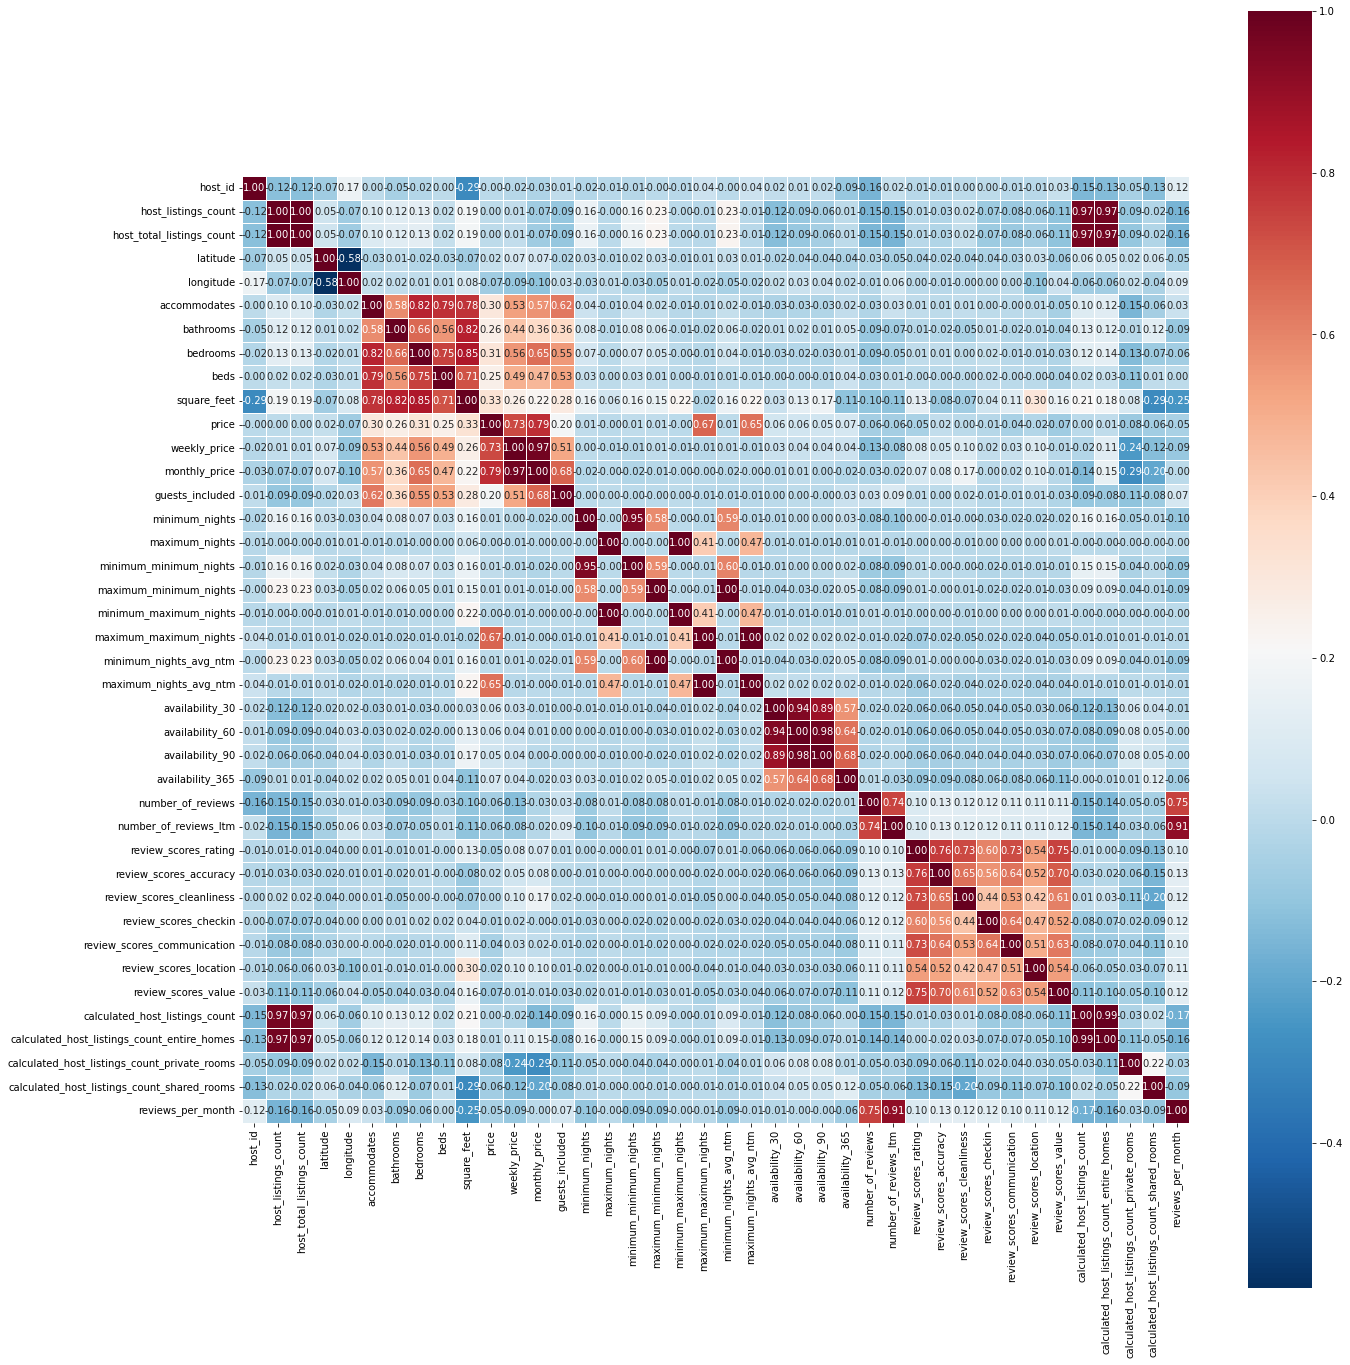

In [24]:
df = dfs_0_dropped[dfs_0_dropped.columns.to_list()[:]]
df_corr = df._get_numeric_data().astype(float).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr,
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

#### w/ Imputation

In [25]:
df_imputations[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 4952 to 43591340
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  7221 non-null   object 
 1   host_id                                       7221 non-null   int64  
 2   host_name                                     7221 non-null   object 
 3   host_since                                    7221 non-null   object 
 4   host_response_rate                            7221 non-null   object 
 5   host_acceptance_rate                          7221 non-null   object 
 6   host_neighbourhood                            7221 non-null   object 
 7   host_listings_count                           7221 non-null   float64
 8   host_total_listings_count                     7221 non-null   float64
 9   host_has_profile_pic                          7221 non-n

In [26]:
df = df_imputations[0][df_imputations[0].columns.to_list()[:]]
df_corr = df._get_numeric_data().astype(float).corr()

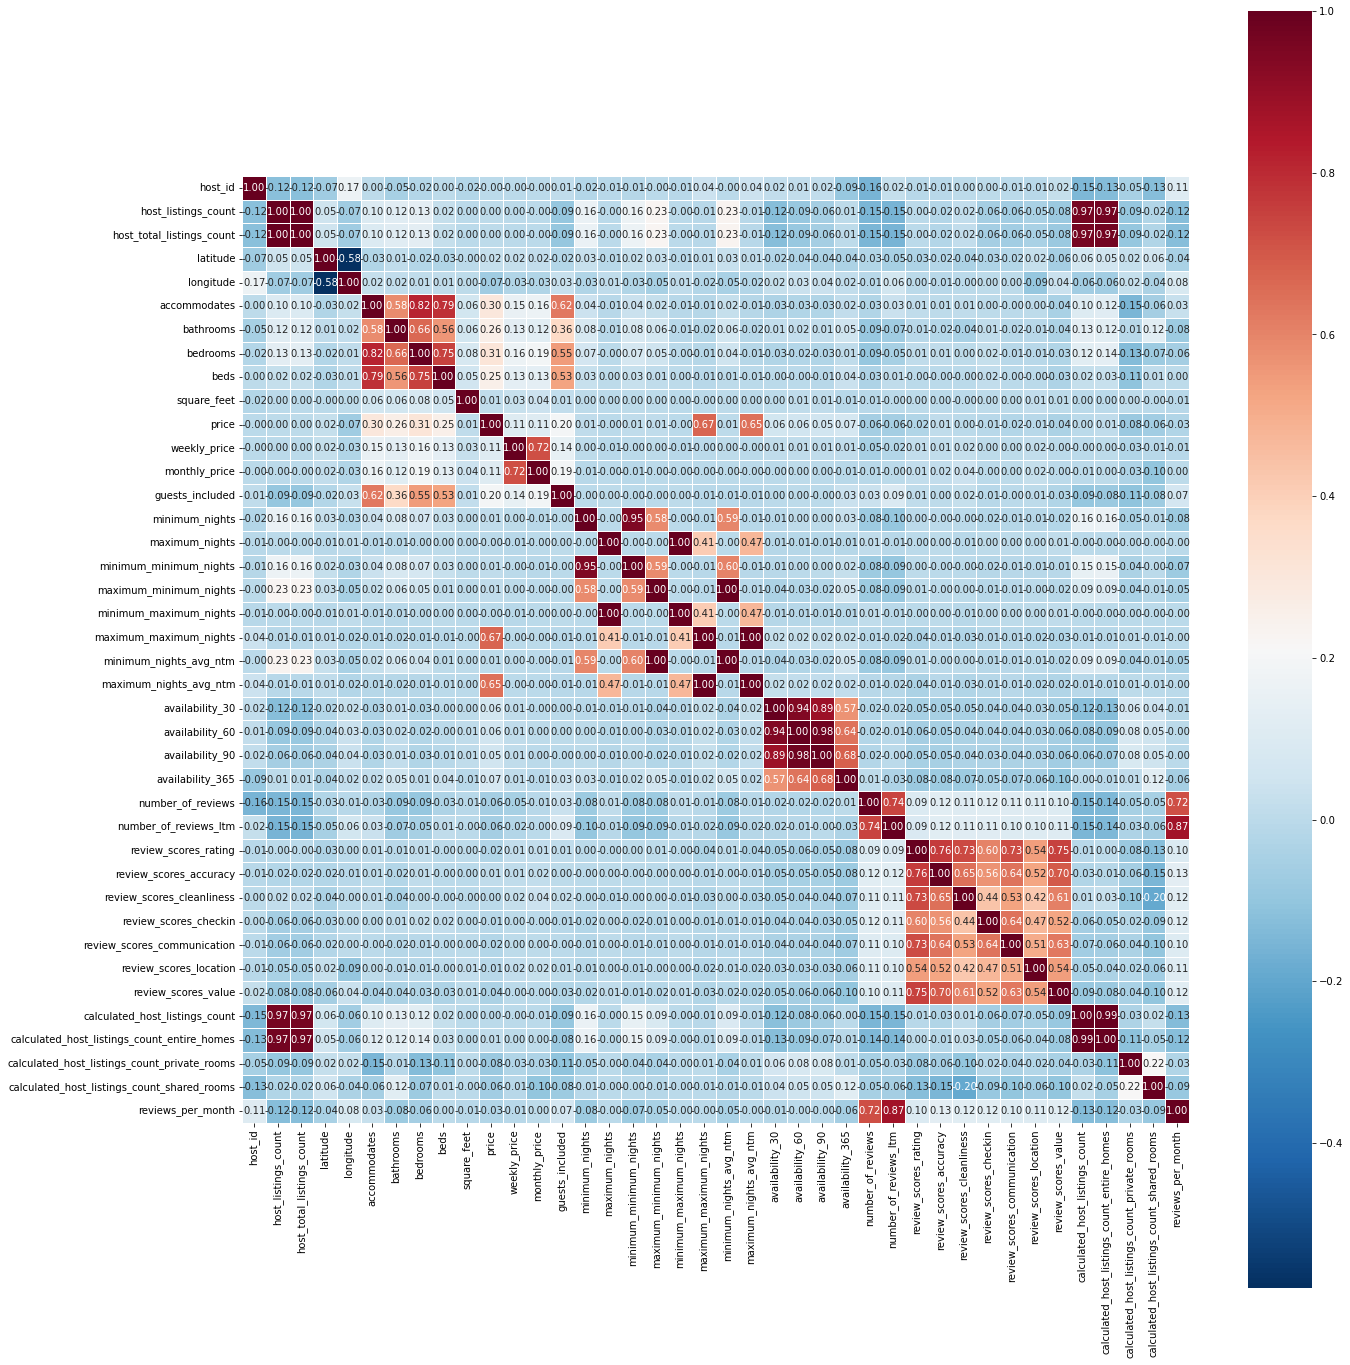

In [27]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr,
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

###4.1.2 Xis value_counts() (already on kaggle)

#### w/o imputation

<Figure size 2160x2160 with 0 Axes>

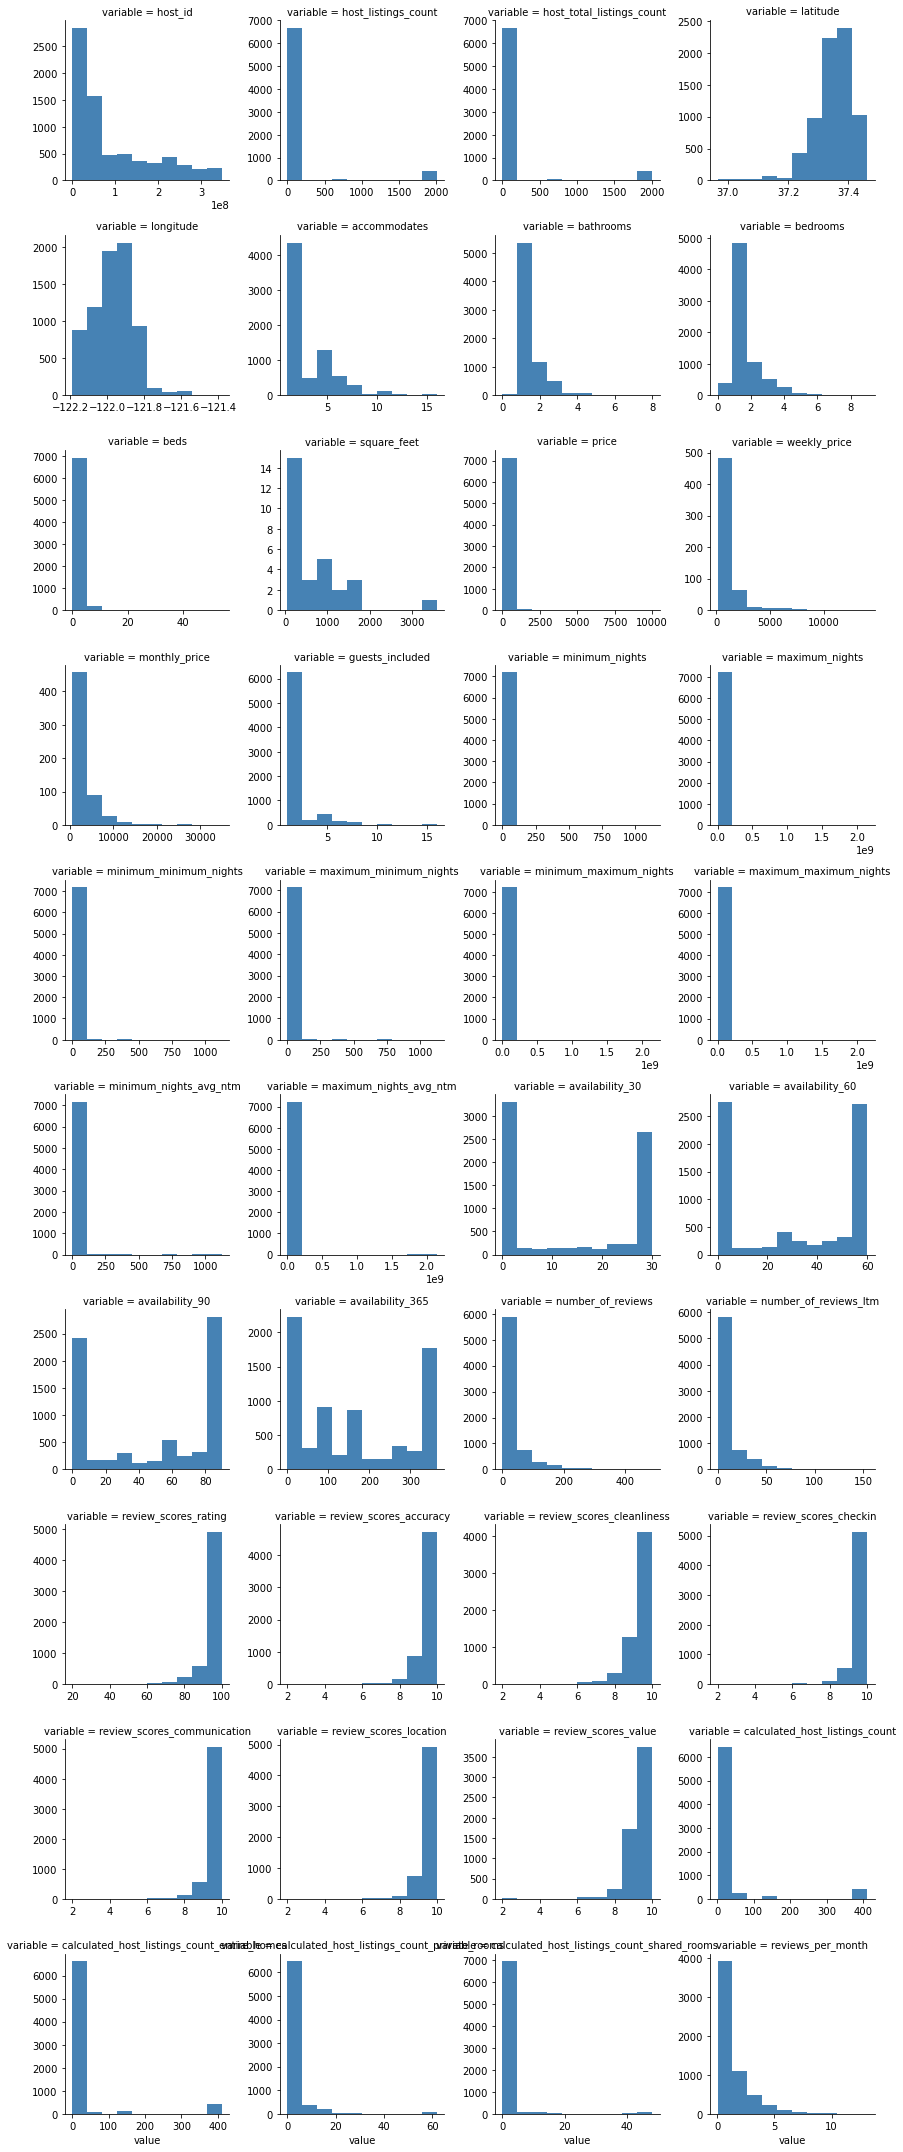

In [28]:
df = dfs_0_dropped
quan = list(df.loc[:, df.dtypes != 'object'].columns.values)
plt.figure(figsize=(30, 30))
# quan = list(df.loc[:, df.dtypes != 'object'].columns.values)
grid = sns.FacetGrid(pd.melt(df, value_vars=quan),
                     col='variable', col_wrap=4, height=3, aspect=1,
                     sharex=False, sharey=False)
grid.map(plt.hist, 'value', color="steelblue")
plt.show()

#### w/ Imputation

<Figure size 2160x2160 with 0 Axes>

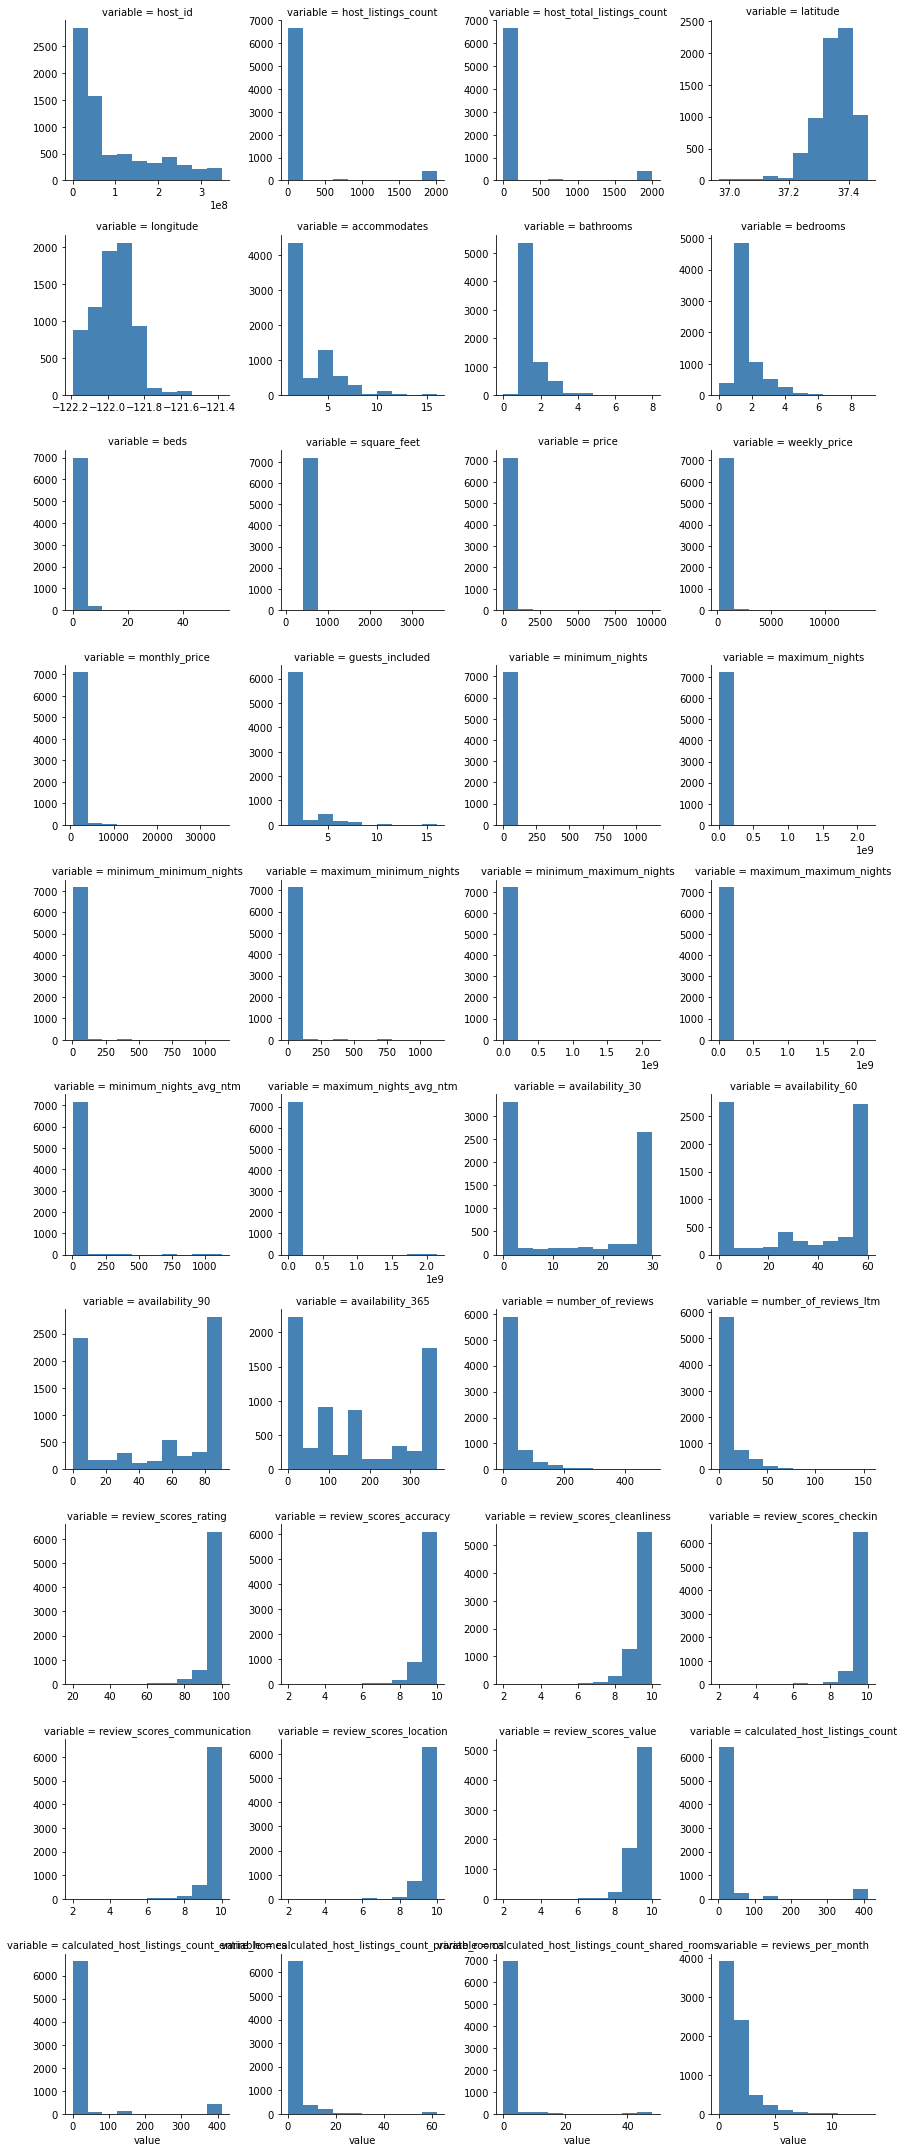

In [29]:
df = df_imputations[0]
quan = list(df.loc[:, df.dtypes != 'object'].columns.values)
plt.figure(figsize=(30, 30))
# quan = list(df.loc[:, df.dtypes != 'object'].columns.values)
grid = sns.FacetGrid(pd.melt(df, value_vars=quan),
                     col='variable', col_wrap=4, height=3, aspect=1,
                     sharex=False, sharey=False)
grid.map(plt.hist, 'value', color="steelblue")
plt.show()

###4.1.3 Y vs Per Xi (any one has Tableau?)

#### w/o Imputation

40


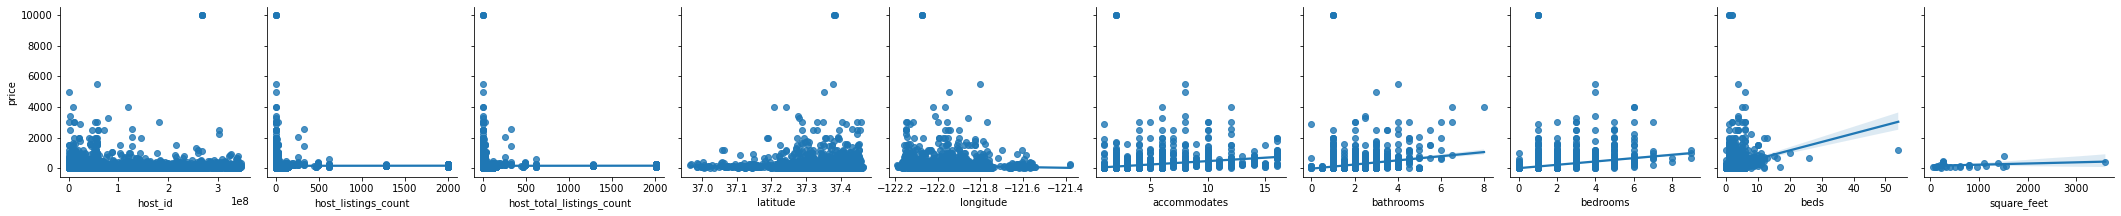

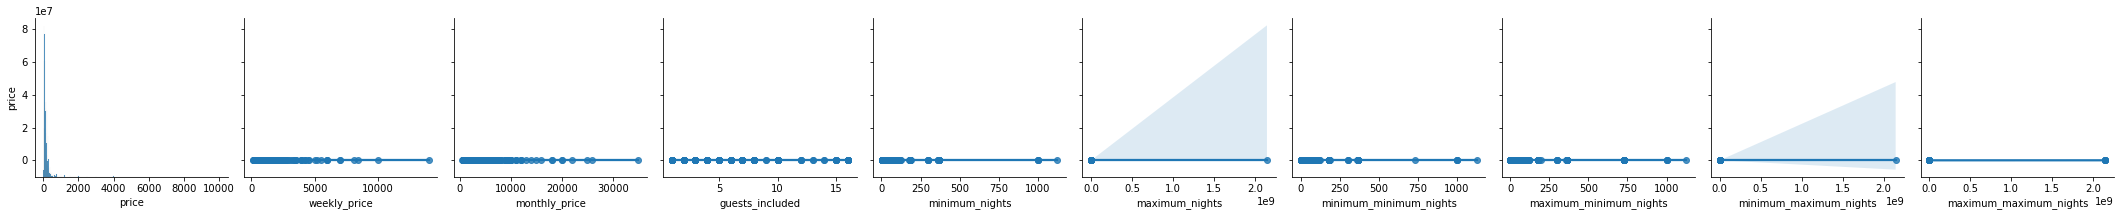

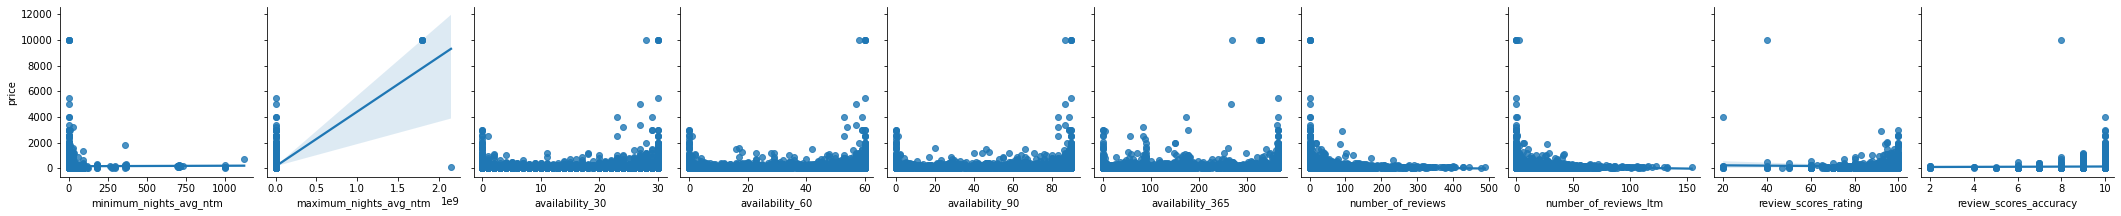

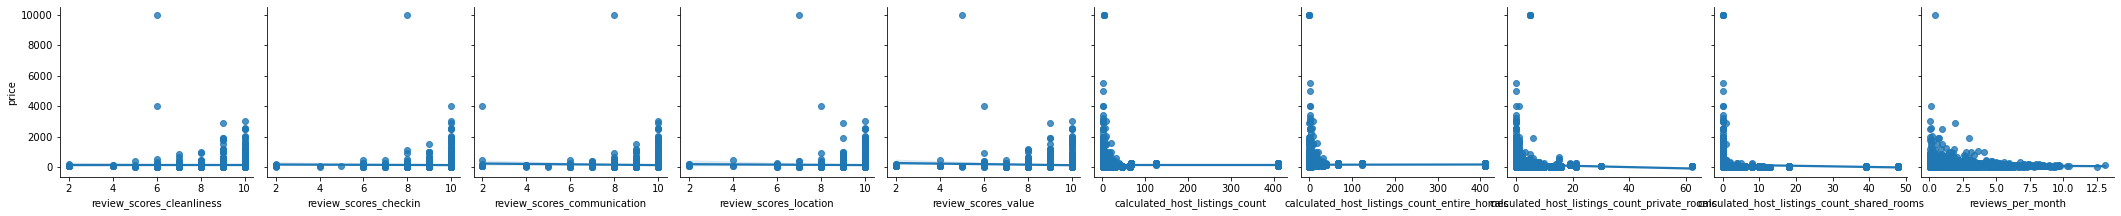

In [30]:
df = dfs_0_dropped
# Visualize correlations between dependent and numerial independent variables
print(len(quan))
start = 0
leng = 10
for i in range(len(quan) // leng):
    if not quan[start:start + leng]: 
        break
    sns.pairplot(data=df, y_vars=['price'], x_vars=quan[start:start + leng], kind='reg',
            height=3, aspect=1.0)
    start += leng
    # print(start, start + leng)
    plt.show()

#### w/ Imputation

40


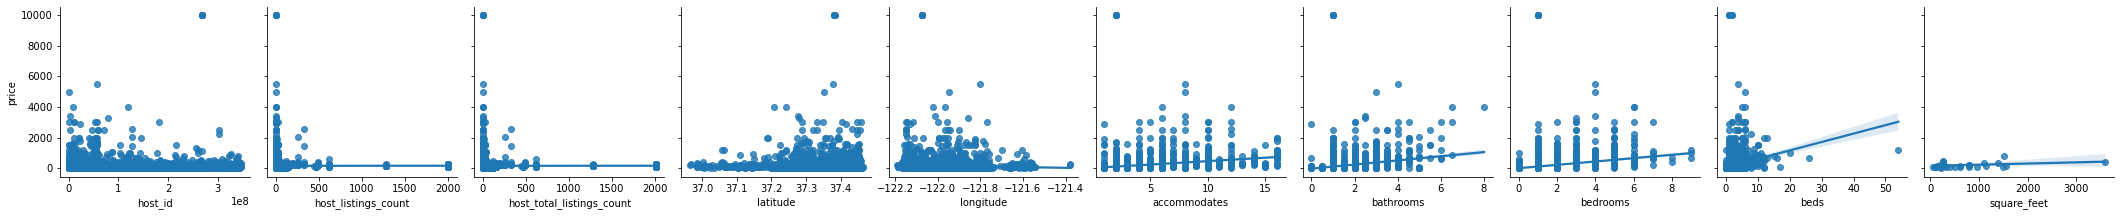

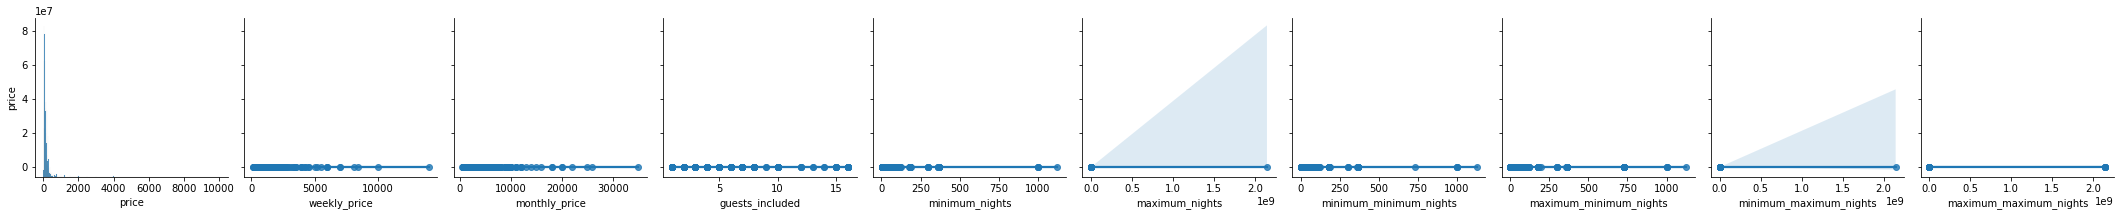

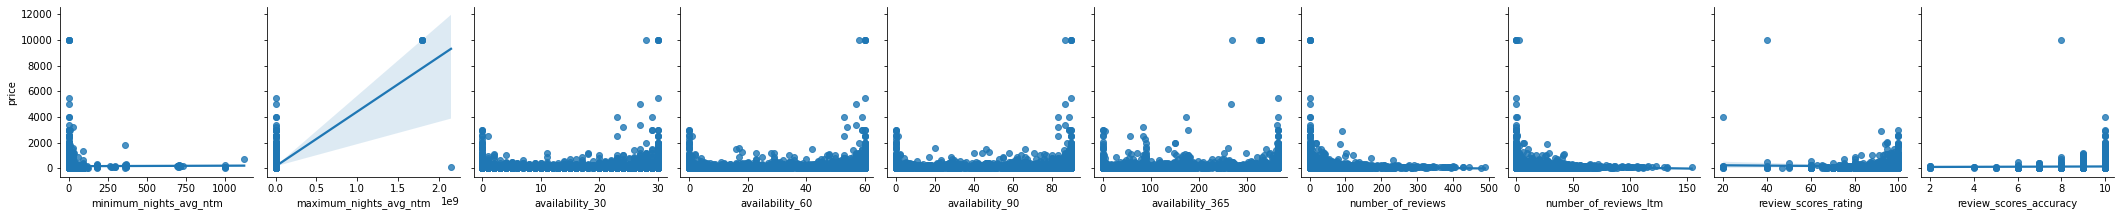

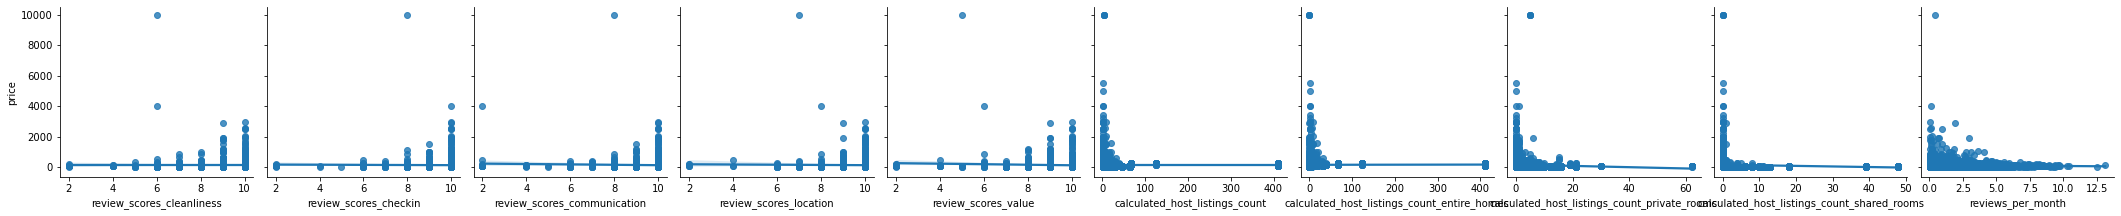

In [31]:
# Visualize correlations between dependent and numerial independent variables
print(len(quan))
start = 0
leng = 10
for i in range(len(quan) // leng):
    if not quan[start:start + leng]: 
        break
    sns.pairplot(data=df, y_vars=['price'], x_vars=quan[start:start + leng], kind='reg',
            height=3, aspect=1.0)
    start += leng
    # print(start, start + leng)
    plt.show()

In [32]:
quan

['host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']